In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

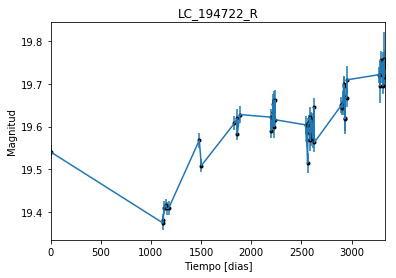

In [2]:
data = np.genfromtxt('LC_194722_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_194722_R')
plt.savefig("LC_194722_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

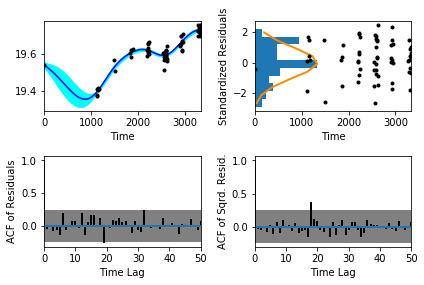

In [5]:
sample.assess_fit()

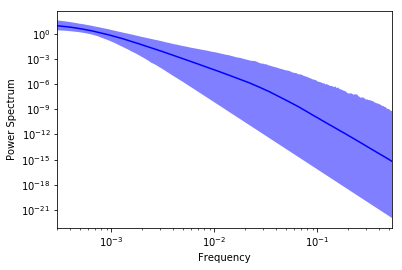

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

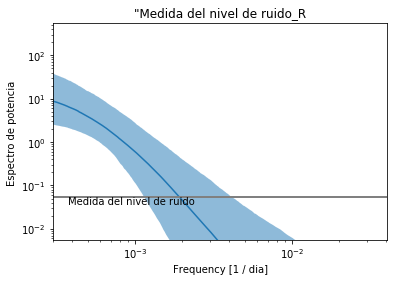

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_194722_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_194722_R')

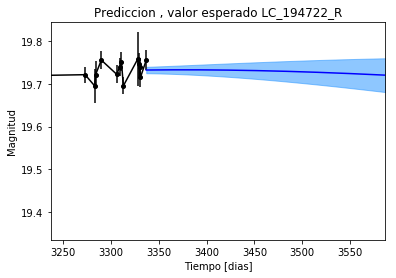

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_194722_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_194722_R')

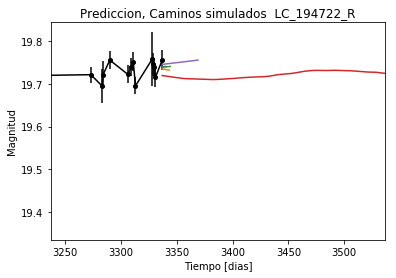

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_194722_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


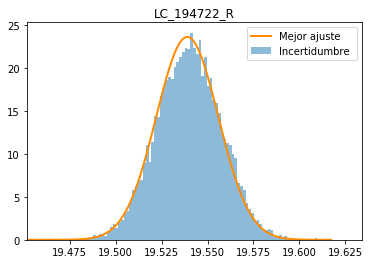

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_194722_R')
plt.savefig("Mejor_ajuste_LC_194722_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_194722_R')

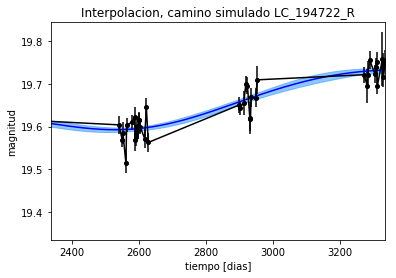

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_R')

Text(0.5,1,'Interpolacion, camino simulado LC_194722_R')

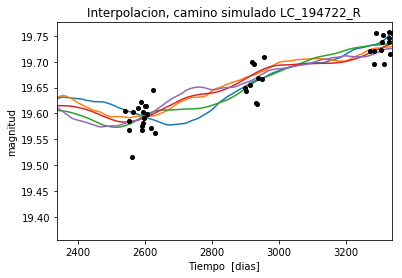

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1227.71739278
Median: 0.00567201971641
Standard deviation: 0.21601417968
68% credibility interval: [ 0.00049782  0.25012875]
95% credibility interval: [  3.17467448e-04   7.96962916e-01]
99% credibility interval: [  3.02346689e-04   1.02161158e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 454.311848954
Median: 0.000545805013256
Standard deviation: 0.0541744159939
68% credibility interval: [ 0.00034052  0.00290066]
95% credibility interval: [ 0.00030605  0.09843493]
99% credibility interval: [  3.00659586e-04   4.08947052e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 575.407518953
Median: 0.012208068122
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 385.405573914
Median: 158.854119973
Standard deviation: 1.71628660428
68% credibility interval: [ 156.87089939  160.17737447]
95% credibility interval: [ 154.36224132  160.78628988]
99% credibility interval: [ 152.49647379  161.03575239]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 305.611953764
Median: 0.535803070001
Standard deviation: 2.19196192826
68% credibility interval: [ 0.02514982  3.83426399]
95% credibility interval: [ 0.01057212  7.32372692]
99% credibility interval: [  8.55008175e-03   1.00206475e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 530.655962377
Median: 0.0805334340935
Standard deviation: 7.19058627447
68% credibility interval: [  1.98181372e-03   3.54411521e+00]
95% credibility inter

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13260.7256577
Median: 3.44586781194e-33
Standard deviation: 1.1774478144e+88
68% credibility interval: [  1.03792742e-71   1.56965627e-14]
95% credibility interval: [  2.65403545e-113   1.56171031e-003]
99% credibility interval: [  5.26380592e-124   1.58779370e+044]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1520.46638398
Median: 19.5782879446
Standard deviation: 0.0743410686139
68% credibility interval: [ 19.51618847  19.64463587]
95% credibility interval: [ 19.42856126  19.72844364]
99% credibility interval: [ 19.33714685  19.79256707]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 199.22175122
Median: 0.0
Standard deviation: 0.196152173438
68% credibility interval: [ 0.          0.11535984]
95% credibility interval: [ 0.          0.80074898]
99% credibility interval: [ 0.          0.99127147]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 199.22175122
Median: 0.0
Standard deviation: 0.196152173438
68% credibility interval: [ 0.          0.11535984]
95% credibility interval: [ 0.          0.80074898]
99% credibility interval: [ 0.          0.99127147]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1319.0452842
Median: 0.0
Standard deviation: 0.000150529929299
68% credibility interval: [ 0.   

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 385.405573914
Median: 158.854119973
Standard deviation: 1.71628660428
68% credibility interval: [ 156.87089939  160.17737447]
95% credibility interval: [ 154.36224132  160.78628988]
99% credibility interval: [ 152.49647379  161.03575239]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2091.39646175
Median: 0.0133624105466
Standard deviation: 0.0159133036428
68% credibility interval: [ 0.00748342  0.02655571]
95% credibility interval: [ 0.0045779   0.05693037]
99% credibility interval: [ 0.0034929   0.09803516]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1900.36756213
Median: 1.2386614794
Standard deviation: 0.17975265699
68% credibility interval: [ 1.08191169  1.43530688]
95% credibility interval: [ 0.94396977  1.65000903]
99% credibility interval: [ 0.87496011  1.79184275]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 573.847081062
Median: 3.46287390053e-06
Standard deviation: 0.0282372945269
68% credibility interval: [  5.26430870e-08   1.94642026e-04]
95% credibility interval: [  1.00633072e-09   2.27800584e-03]
99% credibility interval: [  3.67688511e-49   9.81503830e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1227.71739278
Median: (-0.0356383509442+0j)
Standard deviation: 1.8333318468
68% credibility interval: [-1.57160532+0.j         -0.00312787-0.00281549j]
95% credibility interval: [ -5.00746568e+00 -5.89430476e+00j  -1.99470681e-03 -1.09285547e-03j]
99% credibility interval: [ -6.41897485e+00+0.j          -1.89970028e-03-0.00091849j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 454.311848954
Median: (-0.00342939403988+0.00177015511675j)
Standard deviation: 1.27860184958
68% credibility interval: [-0.01822538+1.01655737j -0.00213955+0.j        ]
95% credibility interval: [-0.61848488+1.60073852j -0.00192297+0.j        ]
99% credibility interval: [ -2.56949011e+00+6.32495899j  -1.88909989e-03+0.j        ]
Posterior sum